# 02 - Train

In this notebook, we train the model and push it to Hopsworks.

In [19]:
import hopsworks
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd


In [20]:
project = hopsworks.login(project="id2223_pierrelf_emilk2")
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/186517
Connected. Call `.close()` to terminate connection gracefully.


In [21]:
fg = fs.get_feature_group(name="winequality", version=1)
query = fg.select_all()
feature_view = fs.get_or_create_feature_view(name="winequality",
                                  version=1,
                                  description="Read from winequality dataset",
                                  labels=["quality"],
                                  query=query)

In [22]:
# You can read training data, randomly split into train/test sets of features (X) and labels (y)        
X_train, X_test, y_train, y_test = feature_view.train_test_split(0.2)

# Train our model with the Scikit-learn K-nearest-neighbors algorithm using our features (X_train) and labels (y_train)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train.values.ravel())

Finished: Reading data from Hopsworks, using ArrowFlight (1.52s) 


KNeighborsClassifier(n_neighbors=10)

In [23]:
# Evaluate model performance using the features from the test set (X_test)
y_pred = model.predict(X_test)

# Compare predictions (y_pred) with the labels in the test set (y_test)
metrics = classification_report(y_test, y_pred, output_dict=True)
results = confusion_matrix(y_test, y_pred)


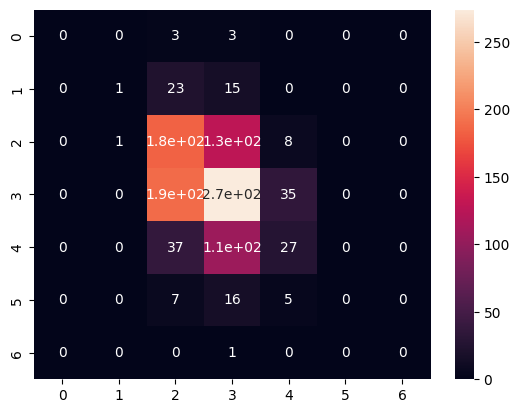

In [24]:
# Create the confusion matrix as a figure, we will later store it as a PNG image file
df_cm = pd.DataFrame(results)
cm = sns.heatmap(df_cm, annot=True)
fig = cm.get_figure()

In [25]:
metrics

{'3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6},
 '4': {'precision': 0.5,
  'recall': 0.02564102564102564,
  'f1-score': 0.048780487804878044,
  'support': 39},
 '5': {'precision': 0.4153498871331828,
  'recall': 0.573208722741433,
  'f1-score': 0.4816753926701571,
  'support': 321},
 '6': {'precision': 0.5036764705882353,
  'recall': 0.5502008032128514,
  'f1-score': 0.5259117082533589,
  'support': 498},
 '7': {'precision': 0.36,
  'recall': 0.15789473684210525,
  'f1-score': 0.21951219512195122,
  'support': 171},
 '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 28},
 '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 'accuracy': 0.4567669172932331,
 'macro avg': {'precision': 0.25414662253163117,
  'recall': 0.1867064697767736,
  'f1-score': 0.1822685405500493,
  'support': 1064},
 'weighted avg': {'precision': 0.4372351467318542,
  'recall': 0.4567669172932331,
  'f1-score': 0.428534639236407,
  'support': 1064}}